In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_log_error, mean_squared_error

pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold

from collections import Counter

from datetime import datetime

In [2]:
train=pd.read_csv('D:\\Data_sets\\movie\\train.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [3]:
train_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TrainAdditionalFeatures.csv')

In [4]:
train=pd.merge(train,train_additionalfeature, how='left', on=['imdb_id'])

In [5]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [6]:
test=pd.read_csv('D:\\Data_sets\\movie\\test.csv')
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [7]:
test_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TestAdditionalFeatures.csv')

In [8]:
test=pd.merge(test,test_additionalfeature, how='left', on=['imdb_id'])

In [9]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [10]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [11]:
has_collection=[]

for i in train.belongs_to_collection:
    d=get_dict(i)
    if d != {}:
        has_collection.append(1)
    else:
        has_collection.append(0)

In [12]:
train['has_collection']=has_collection

In [13]:
has_collection=[]

for i in test.belongs_to_collection:
    d=get_dict(i)
    if d != {}:
        has_collection.append(1)
    else:
        has_collection.append(0)

In [14]:
test['has_collection']=has_collection

In [15]:
train.drop('belongs_to_collection', axis=1, inplace=True)

In [16]:
test.drop('belongs_to_collection', axis=1, inplace=True)

In [17]:
no_of_genre=[]

for i in train.genres:
    d=get_dict(i)

    no_of_genre.append(len(d))

In [18]:
train['no_of_genre']=no_of_genre

In [19]:
no_of_genre=[]

for i in test.genres:
    d=get_dict(i)

    no_of_genre.append(len(d))

In [20]:
test['no_of_genre']=no_of_genre

In [21]:
train.drop(['genres'], axis=1, inplace=True)

In [22]:
test.drop(['genres'], axis=1, inplace=True)

In [23]:
homepage_exit=[]
for i in train.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)

In [24]:
train['homepage_exit']=homepage_exit

In [25]:
homepage_exit=[]
for i in test.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)

In [26]:
test['homepage_exit']=homepage_exit

In [27]:
train.drop('homepage', axis=1, inplace=True)

In [28]:
test.drop('homepage', axis=1, inplace=True)

In [29]:
train.drop('imdb_id', axis=1, inplace=True)

In [30]:
test.drop('imdb_id', axis=1, inplace=True)

In [31]:
orignal_lang_english=[]

for i in train.original_language:
    if str(i)=='en':
        orignal_lang_english.append(1)
    else:
        orignal_lang_english.append(0)

In [32]:
train['orignal_lang_english']=orignal_lang_english

In [33]:
orignal_lang_english=[]

for i in test.original_language:
    if str(i)=='en':
        orignal_lang_english.append(1)
    else:
        orignal_lang_english.append(0)

In [34]:
test['orignal_lang_english']=orignal_lang_english

In [35]:
train.drop('original_language', axis=1, inplace=True)

In [36]:
test.drop('original_language', axis=1, inplace=True)

In [37]:
len('Hot Tub Time Machine 2')

22

In [38]:
train['original_title_letter_count'] = train.original_title.str.len()

In [39]:
train['original_title_word_count'] = train.original_title.str.split().str.len()

In [40]:
train.head(1)

,budget,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count
0,14000000,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,1,0,1,22,5


In [41]:
test['original_title_letter_count'] = test.original_title.str.len()
test['original_title_word_count'] = test.original_title.str.split().str.len()

In [42]:
train['overview_word_count'] = train.overview.str.split().str.len()
test['overview_word_count'] = test.overview.str.split().str.len()


In [43]:
no_of_prod_comp=[]

for i in train.production_companies:
    d=get_dict(i)

    no_of_prod_comp.append(len(d))

In [44]:
train['no_of_prod_comp']=no_of_prod_comp

In [45]:
no_of_prod_comp=[]

for i in test.production_companies:
    d=get_dict(i)

    no_of_prod_comp.append(len(d))

In [46]:
test['no_of_prod_comp']=no_of_prod_comp

In [47]:
production_country_usa=[]

for i in train.production_countries:
    d=get_dict(i)
    if d!={}:
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)

In [48]:
train['production_country_usa']=production_country_usa

In [49]:
production_country_usa=[]

for i in test.production_countries:
    d=get_dict(i)
    if d!={}:
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)

In [50]:
test['production_country_usa']=production_country_usa

In [51]:
no_prod_countries=[]

for i in train.production_countries:
    d=get_dict(i)

    no_prod_countries.append(len(d))

In [52]:
train['no_prod_countries']=no_prod_countries

In [53]:
no_prod_countries=[]

for i in test.production_countries:
    d=get_dict(i)

    no_prod_countries.append(len(d))

In [54]:
test['no_prod_countries']=no_prod_countries

In [55]:
train.drop('production_countries', axis=1, inplace=True)

In [56]:
test.drop('production_countries', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of releases')

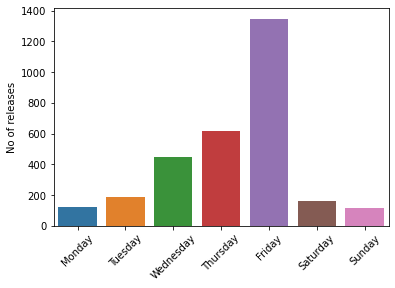

In [57]:
def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
train['release_date'] =train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']  =test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

#from datetime import datetime
train['release_date'] = train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']  = test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

train['release_day']   = train['release_date'].apply(lambda x:x.weekday())
train['release_month'] = train['release_date'].apply(lambda x:x.month)
train['release_year']  = train['release_date'].apply(lambda x:x.year)

test['release_day']   = test['release_date'].apply(lambda x:x.weekday())
test['release_month'] = test['release_date'].apply(lambda x:x.month)
test['release_year']  = test['release_date'].apply(lambda x:x.year)

day=train['release_day'].value_counts().sort_index()
sns.barplot(day.index,day)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.ylabel('No of releases')

In [58]:
train.drop('release_date', axis=1, inplace=True)

In [59]:
test.drop('release_date', axis=1, inplace=True)

In [60]:
train.runtime=train.runtime.fillna(train.runtime.mean())

In [61]:
test.runtime=test.runtime.fillna(test.runtime.mean())

In [62]:
no_lang_spoken=[]

for i in train.spoken_languages:
    d=get_dict(i)

    no_lang_spoken.append(len(d))

In [63]:
train['no_lang_spoken']=no_lang_spoken

In [64]:
no_lang_spoken=[]

for i in test.spoken_languages:
    d=get_dict(i)

    no_lang_spoken.append(len(d))

In [65]:
test['no_lang_spoken']=no_lang_spoken

In [66]:
spoken_lang_en=[]

for i in train.spoken_languages:
    d=get_dict(i)
    if d!={}:
        if 'English' in (d[0]['name']):
            spoken_lang_en.append(1)
        else:
            spoken_lang_en.append(0)
    else:
        spoken_lang_en.append(1)

In [67]:
train['spoken_lang_en']=spoken_lang_en

In [68]:
spoken_lang_en=[]

for i in test.spoken_languages:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'English' in (d[0]['name']):
            spoken_lang_en.append(1)
        else:
            spoken_lang_en.append(0)
    else:
        spoken_lang_en.append(1)

In [69]:
test['spoken_lang_en']=spoken_lang_en

In [70]:
train.drop('spoken_languages', axis=1, inplace=True)

In [71]:
test.drop('spoken_languages', axis=1, inplace=True)

In [72]:
train['is_released']=1

In [73]:
test['is_released']=1

In [74]:
train.loc[ train['status']!= 'Released','is_released' ]=0

In [75]:
test.loc[ test['status']!= 'Released','is_released' ]=0

In [76]:
has_tagline=[]
for i in train.tagline:
#     print(i)
    if str(i)=='nan':
        has_tagline.append(0)
    else:
        has_tagline.append(1)

In [77]:
train['has_tagline']=has_tagline

In [78]:
has_tagline=[]
for i in test.tagline:
#     print(i)
    if str(i)=='nan':
        has_tagline.append(0)
    else:
        has_tagline.append(1)

In [79]:
test['has_tagline']=has_tagline

In [80]:
train.drop('tagline', axis=1, inplace=True)

In [81]:
test.drop('tagline', axis=1, inplace=True)

In [82]:
train['title_word_count'] = train.title.str.split().str.len()
test['title_word_count'] = test.title.str.split().str.len()

In [83]:
train.drop('title', axis=1, inplace=True)

In [84]:
test.drop('title', axis=1, inplace=True)

In [85]:
has_keyword=[]
for i in train.Keywords:
#     print(i)
    if str(i)=='nan':
        has_keyword.append(0)
    else:
        has_keyword.append(1)

In [86]:
np.unique(has_keyword, return_counts=True)

(array([0, 1]), array([ 276, 2724], dtype=int64))

In [87]:
train['has_keyword']=has_keyword

In [88]:
has_keyword=[]
for i in test.Keywords:
#     print(i)
    if str(i)=='nan':
        has_keyword.append(0)
    else:
        has_keyword.append(1)

In [89]:
test['has_keyword']=has_keyword

In [90]:
no_of_keyword=[]

for i in train.Keywords:
    d=get_dict(i)

    no_of_keyword.append(len(d))

In [91]:
train['no_of_keyword']=no_of_keyword

In [92]:
no_of_keyword=[]

for i in test.Keywords:
    d=get_dict(i)

    no_of_keyword.append(len(d))

In [94]:
test['no_of_keyword']=no_of_keyword

In [95]:
train.drop('Keywords', axis=1, inplace=True)

In [96]:
test.drop('Keywords', axis=1, inplace=True)

In [97]:
no_cast=[]

for i in train.cast:
    d=get_dict(i)

    no_cast.append(len(d))

In [98]:
train['no_cast']=no_cast

In [99]:
no_cast=[]

for i in test.cast:
    d=get_dict(i)

    no_cast.append(len(d))

In [100]:
test['no_cast']=no_cast

In [101]:
train.drop('cast', axis=1, inplace=True)

In [102]:
test.drop('cast', axis=1, inplace=True)

In [103]:
no_of_crew=[]

for i in train.crew:
    d=get_dict(i)

    no_of_crew.append(len(d))

In [104]:
train['no_of_crew']=no_of_crew

In [105]:
no_of_crew=[]

for i in test.crew:
    d=get_dict(i)

    no_of_crew.append(len(d))

In [106]:
test['no_of_crew']=no_of_crew

In [107]:
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 2]))

In [108]:
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 2]))

In [109]:
train.drop('crew', axis=1, inplace=True)
test.drop('crew', axis=1, inplace=True)

In [110]:
train.drop('overview', axis=1, inplace=True)
test.drop('overview', axis=1, inplace=True)

In [111]:
train.drop('poster_path', axis=1, inplace=True)
test.drop('poster_path', axis=1, inplace=True)

In [112]:
train.drop('production_companies', axis=1, inplace=True)
test.drop('production_companies', axis=1, inplace=True)

In [113]:
train.drop('original_title', axis=1, inplace=True)
test.drop('original_title', axis=1, inplace=True)

In [114]:
train.drop('status', axis=1, inplace=True)
test.drop('status', axis=1, inplace=True)

In [115]:
train.popularity2=train.popularity2.fillna(train.popularity2.median())
test.popularity2=test.popularity2.fillna(test.popularity2.median())

In [116]:
train.rating=train.rating.fillna(train.rating.mean())
test.rating=test.rating.fillna(test.rating.mean())

In [117]:
train.totalVotes=train.totalVotes.fillna(train.totalVotes.median())
test.totalVotes=test.totalVotes.fillna(test.totalVotes.median())

In [118]:
train['popularity'] = np.log1p(train['popularity'])   #log(1+x)  #expm1 - inverse
train['popularity2'] = np.log1p(train['popularity2'])
train['budget'] = np.log1p(train['budget'])
train['runtime'] = np.log1p(train['runtime'])
train['totalVotes'] = np.log1p(train['totalVotes'])
train['revenue'] = np.log1p(train['revenue'])

In [119]:
test['popularity'] = np.log1p(test['popularity'])   #log(1+x)  #expm1 - inverse
test['popularity2'] = np.log1p(test['popularity2'])
test['budget'] = np.log1p(test['budget'])
test['runtime'] = np.log1p(test['runtime'])
test['totalVotes'] = np.log1p(test['totalVotes'])

In [120]:
train.head(2)

,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,production_country_usa,no_prod_countries,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,is_released,has_tagline,title_word_count,has_keyword,no_of_keyword,no_cast,no_of_crew,genders_0_crew,genders_1_crew,genders_2_crew
0,16.454568,2.024905,4.543295,16.326300,2.433613,5.0,6.180017,1,1,0,1,22,5,29.0,3,1,1,4,2,2015,1,1,1,1,5,1,4,24,72,59,0,13
1,17.504390,2.224504,4.736198,18.370959,2.786800,6.4,7.332369,1,4,0,1,40,6,69.0,1,1,1,4,8,2004,1,1,1,1,6,1,4,20,9,1,4,4


In [121]:
test.head(2)

,budget,popularity,runtime,popularity2,rating,totalVotes,has_collection,no_of_genre,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,production_country_usa,no_prod_countries,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,is_released,has_tagline,title_word_count,has_keyword,no_of_keyword,no_cast,no_of_crew,genders_0_crew,genders_1_crew,genders_2_crew
0,0.000000,1.579295,4.510860,2.010627,6.6,4.521789,1,4,1,0,18,1,57.0,0,0,2,5,7,2007,2,1,1,1,5.0,1,2,7,2,1,0,1
1,11.385103,1.517276,4.189655,1.536652,4.5,3.951244,0,2,0,1,27,6,29.0,1,1,1,0,5,1958,1,1,1,1,6.0,1,8,10,8,2,0,6


In [122]:
train.shape

(3000, 32)

In [123]:
test.shape

(4398, 31)

In [124]:
train.fillna(0, inplace=True)

In [125]:
train.isnull().sum().sum()

0

In [126]:
test.fillna(0, inplace=True)

In [127]:
test.isnull().sum().sum()

0

In [128]:
X=train.drop('revenue', axis=1)

In [129]:
y=train.revenue

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
X_train

,budget,popularity,runtime,popularity2,rating,totalVotes,has_collection,no_of_genre,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,production_country_usa,no_prod_countries,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,is_released,has_tagline,title_word_count,has_keyword,no_of_keyword,no_cast,no_of_crew,genders_0_crew,genders_1_crew,genders_2_crew
642,17.479072,2.178165,4.762174,2.495764,6.6,7.417580,0,2,0,1,17,3,50.0,2,1,1,1,6,1988,1,1,1,1,3,1,8,14,12,2,1,9
700,17.034386,2.129324,4.553877,2.097650,6.7,6.448889,0,3,0,1,22,4,71.0,2,1,1,4,12,1986,1,1,1,1,4,1,27,17,15,4,2,9
226,17.727534,2.159734,4.663439,2.608009,5.3,6.813445,0,4,1,1,11,2,75.0,5,1,1,3,2,2011,1,1,1,1,2,1,10,51,70,48,2,20
1697,0.000000,1.925754,4.890349,2.016369,6.3,4.219508,0,3,0,1,15,2,75.0,3,0,2,4,1,1992,1,1,1,1,2,1,4,12,6,0,1,5
1010,17.370859,2.907483,4.836282,2.822212,5.8,7.412764,0,1,0,1,10,1,23.0,4,1,1,4,7,2015,1,1,1,1,1,1,2,34,22,4,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.000000,2.226911,4.867534,2.004987,6.0,4.605170,1,5,1,0,19,4,51.0,1,0,1,3,1,2008,1,0,1,1,4,1,1,5,3,2,0,1
1095,17.875954,2.752771,4.875197,2.906081,6.8,7.515889,1,3,1,1,9,1,27.0,2,0,2,3,11,1995,3,1,1,1,1,1,15,20,46,23,5,18
1130,0.000000,2.161450,4.574711,2.306378,6.9,5.686975,1,3,0,1,21,4,27.0,1,1,1,3,5,1977,1,1,1,1,4,1,4,14,12,3,0,9
1294,16.993564,1.655000,4.905275,1.720084,5.8,4.624973,0,4,0,1,7,2,59.0,2,1,1,1,10,1978,1,1,1,1,2,1,5,10,10,3,1,6


In [156]:
def get_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error( np.expm1(y_true), y_pred ))

In [157]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

predict=lr.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
get_score(y_test,predict)

2.160685271532774

In [188]:
kf = KFold(n_splits=5)
kf
score=[]

for train_index, test_index in kf.split(X,y):
#     print(train_index)
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]

    lr.fit(X_train,y_train)

    predict=lr.predict(X_test)
    predict=np.expm1(predict)


    # np.sqrt(mean_squared_log_error( y_test, predict ))
    score.append(get_score(y_test,predict))

np.mean(score)

2.274751616195896

In [243]:
from sklearn.ensemble import RandomForestRegressor


rdf=RandomForestRegressor(n_estimators=300,max_depth=15, min_samples_split= 6,random_state=42)

rdf.fit(X_train,y_train)

predict=rdf.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

1.9402144207328236

In [242]:

# df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
# df['revenue']=predict

# df.to_csv('my_submission.csv', index=False)
# df

In [204]:
rdf=RandomForestRegressor()

n_estimators = [50,100,150,200,150,300,350,400,450,500,1000,2000,3000,5000,10000]
max_depth = [2,5,6,7,8,9,10]
min_samples_split=[2,3,4,5,6,7]

parameter = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'min_samples_split':min_samples_split,
         }

In [205]:
rfr_random = RandomizedSearchCV(estimator=rdf, param_distributions=parameter,cv = 5, random_state=42, n_jobs=-1)

In [206]:
rfr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 150, 200, 150,
                                                         300, 350, 400, 450,
                                                         500, 1000, 2000, 3000,
                                                         5000, 10000]},
                   random_state=42)

In [207]:
rfr_random.best_params_

{'n_estimators': 300, 'min_samples_split': 6, 'max_depth': 10}

In [208]:
predict=rfr_random.predict(X_test)
predict=np.expm1(predict)

np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

1.941209176009816

In [210]:
rfr_random.best_estimator_.feature_importances_

array([0.21946548, 0.09311004, 0.04202108, 0.02936995, 0.03036712,
       0.30280551, 0.0067425 , 0.0078031 , 0.00145233, 0.00363295,
       0.01551792, 0.00421533, 0.01754489, 0.00922555, 0.00333775,
       0.00611088, 0.01101031, 0.01358537, 0.08470235, 0.01030859,
       0.00210452, 0.00033208, 0.0015708 , 0.00690607, 0.00160484,
       0.01060406, 0.0207247 , 0.01040539, 0.01039439, 0.01074228,
       0.01228188])

In [211]:
feature_imp = [col for col in zip(X_train.columns, rfr_random.best_estimator_.feature_importances_)]
feature_imp.sort(key=lambda x:x[1], reverse=True)

In [212]:
feature_imp

[('totalVotes', 0.30280551127878275),
 ('budget', 0.21946547724357304),
 ('popularity', 0.09311003970492186),
 ('release_year', 0.08470234760933917),
 ('runtime', 0.04202107502713558),
 ('rating', 0.0303671232822539),
 ('popularity2', 0.029369948537659344),
 ('no_cast', 0.020724698918353872),
 ('overview_word_count', 0.017544889055445483),
 ('original_title_letter_count', 0.015517918253797223),
 ('release_month', 0.013585371009606826),
 ('genders_2_crew', 0.01228188286398184),
 ('release_day', 0.011010311527533694),
 ('genders_1_crew', 0.010742284944337783),
 ('no_of_keyword', 0.010604056508625469),
 ('no_of_crew', 0.010405385672415314),
 ('genders_0_crew', 0.010394391806354332),
 ('no_lang_spoken', 0.01030859074359241),
 ('no_of_prod_comp', 0.009225548318087296),
 ('no_of_genre', 0.007803098987644506),
 ('title_word_count', 0.006906073227669743),
 ('has_collection', 0.006742498645001525),
 ('no_prod_countries', 0.006110875894500389),
 ('original_title_word_count', 0.004215333367450788

In [227]:
from xgboost import XGBRegressor


xgb=XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            gamma=1.45, 
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

xgb.fit(X,y)

predict=xgb.predict(test)
predict1=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [228]:
predict1

array([ 2340223.  ,  1160087.  , 12176885.  , ..., 37795640.  ,
       21614684.  ,   172916.64], dtype=float32)

In [234]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')

ans=(predict1+predict2)/2

df['revenue']=ans

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,1.723106e+06
1,3002,2.006736e+06
2,3003,1.332534e+07
3,3004,2.514124e+07
4,3005,3.690121e+05
...,...,...
4393,7394,4.136380e+07
4394,7395,5.373619e+07
4395,7396,3.212740e+07
4396,7397,2.127526e+07


In [ ]:
from xgboost import XGBRegressor


xgb=XGBRegressor(max_depth=15, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                 ob
                            gamma=1.45, 
                            subsample=0.8, 
                            colsample_bytree=0.7
                )

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [ ]:
def average_model(rdf,xgb,lgb):
    
    avg=
    
    

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
xgb_cv=XGBRegressor()

parameter={
        
    'n_estimators' : 

    'max_depth' : int
        Maximum tree depth for base learners.
    'learning_rate' : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended to study this option from parameters
        document.
    n_jobs : int
        Number of parallel threads used to run xgboost.  When used with other Scikit-Learn
        algorithms like grid search, you may choose which algorithm to parallelize and
        balance the threads.  Creating thread contention will significantly slow dowm both
        algorithms.
    gamma : float
        Minimum loss reduction required to make a further partition on a leaf
        node of the tree.
    min_child_weight : float
        Minimum sum of instance weight(hessian) needed in a child.
    max_delta_step : int
        Maximum delta step we allow each tree's weight estimation to be.
    subsample : float
        Subsample ratio of the training instance.
    colsample_bytree : float
        Subsample ratio of columns when constructing each tree.
    colsample_bylevel : float
        Subsample ratio of columns for each level.
    colsample_bynode : float
        Subsample ratio of columns for each split.
    reg_alpha : float (xgb's alpha)
        L1 regularization term on weights
    reg_lambda : float (xgb's lambda)
        L2 regularization term on weights
    scale_pos_weight : float
        Balancing of positive and negative weights.
    base_score:
        The initial prediction score of all instances, global bias.
    random_state : int
        Random number seed.
    
    
    
    
    
}


In [151]:
scores1 = cross_val_score(xgb,X_train, y_train, cv=5)
np.average(scores1)

0.5239135601469094

In [140]:

# df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
# df['revenue']=predict

# df.to_csv('my_submission.csv', index=False)
# df

KFold(n_splits=5, random_state=None, shuffle=False)

In [142]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

In [223]:
from lightgbm import LGBMRegressor


lgb=LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)



lgb.fit(X,y)

predict=lgb.predict(test)
predict2=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

[LightGBM] [Warning] Unknown parameter: use_best_model
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.8 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [224]:
predict2

array([ 1105988.1906804 ,  2853384.1220031 , 14473795.27835011, ...,
       26459162.35351795, 20935827.61206097,    96186.16938947])

In [233]:
(predict1+predict2)/2

array([ 1723105.5953402 ,  2006735.56100155, 13325340.13917506, ...,
       32127401.17675897, 21275255.80603049,   134551.40500724])

In [230]:
predict1

array([ 2340223.  ,  1160087.  , 12176885.  , ..., 37795640.  ,
       21614684.  ,   172916.64], dtype=float32)

TypeError: only integer scalar arrays can be converted to a scalar index